In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import (
    basis, tensor, destroy, qeye, mesolve
)

## Minimal Example


$$
H
\;=\;
\omega\,a^\dagger a
\;+\;
\Omega\,
\bigl(
  a + a^\dagger
\bigr).
$$


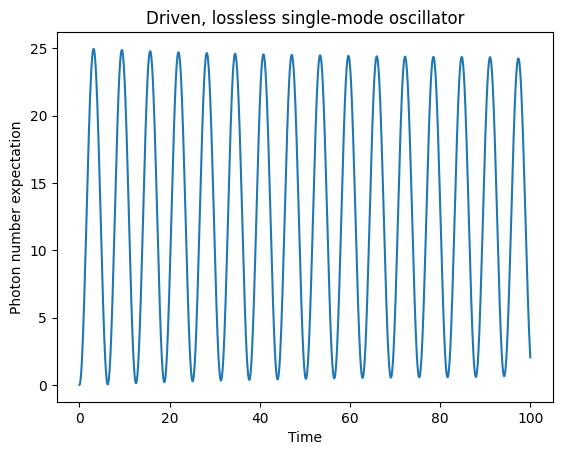

In [9]:
# Parameters
n_max = 40    # truncated Hilbert space
omega = 1.0   # bare frequency of the mode
Omega = 2.5 # drive strength (time-independent in lab frame)

# Operators
a  = destroy(n_max)
num = a.dag() * a

# Hamiltonian: H = omega * a^\dagger a + Omega * (a + a^\dagger)
H = omega * num + Omega*(a + a.dag())

# Initial state: vacuum
psi0 = basis(n_max, 0)

# Time evolution
tlist = np.linspace(0, 100, 2000)
result = mesolve(H, psi0, tlist, [], [num])

# Expectation of photon number
n_t = result.expect[0]

plt.plot(tlist, n_t)
plt.xlabel("Time")
plt.ylabel("Photon number expectation")
plt.title("Driven, lossless single-mode oscillator")
plt.show()


## Two Modes (Inspired by Mert's BHD, But Closed)

$$
H
\;=\;
\sum_{j=1,2}
\Bigl(
  \omega\,\hat{a}_j^\dagger \hat{a}_j
  \;+\;
  \frac{U}{2}\,\hat{a}_j^\dagger \hat{a}_j\,\bigl(\hat{a}_j^\dagger \hat{a}_j - 1\bigr)
\Bigr)
\;-\;
J\,\bigl(\hat{a}_1^\dagger \hat{a}_2 + \hat{a}_2^\dagger \hat{a}_1\bigr)
\;+\;
\Omega
\sum_{j=1,2}
\bigl(\hat{a}_j + \hat{a}_j^\dagger\bigr).
$$


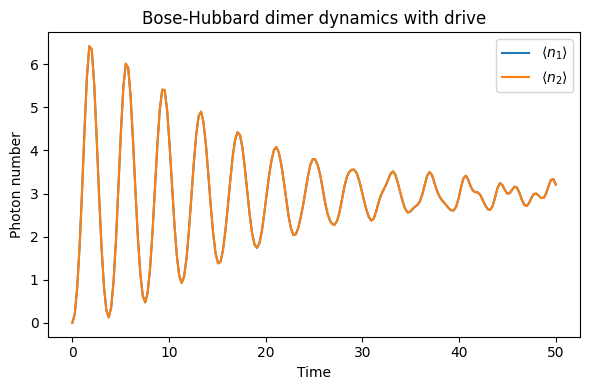

In [14]:


# -------------------------------
# 1. Define system parameters
# -------------------------------
nmax = 10     # Truncation in Fock space for each site
omega = 1.0   # On-site (bare) frequency
U     = 0.2   # On-site interaction strength
J     = 0.3   # Tunneling (hopping) amplitude
Omega = 1.8   # Coherent drive amplitude

# -------------------------------
# 2. Construct operators
# -------------------------------
# Single-mode annihilation operator 'destroy(nmax)' for each site
# We'll build two-mode operators using tensor products.

a1 = tensor(destroy(nmax), qeye(nmax))  # annihilation operator for site 1
a2 = tensor(qeye(nmax), destroy(nmax))  # annihilation operator for site 2

n1 = a1.dag() * a1  # number operator at site 1
n2 = a2.dag() * a2  # number operator at site 2

# Identity on each site, for convenience
I = qeye(nmax)

# Identity on the entire 2-site Hilbert space
I2 = tensor(qeye(nmax), qeye(nmax))

# -------------------------------
# 3. Hamiltonian terms
# -------------------------------
# On-site energies + interactions:
#   H_on_j = omega * n_j + (U/2) * n_j * (n_j - 1)
# for j=1,2.

H_onsite_1 = omega * n1 + 0.5 * U * n1 * (n1 - I2)
H_onsite_2 = omega * n2 + 0.5 * U * n2 * (n2 - I2)

# Tunneling:
#   H_hop = - J * (a1^\dagger a2 + a2^\dagger a1)
H_hop = -J * (a1.dag() * a2 + a2.dag() * a1)

# Drive:
#   H_drive = Omega * (a1 + a1^\dagger + a2 + a2^\dagger)
H_drive = Omega * (a1 + a1.dag() + a2 + a2.dag())

# Total Hamiltonian
H = H_onsite_1 + H_onsite_2 + H_hop + H_drive

# -------------------------------
# 4. Initial state
# -------------------------------
# Start in the vacuum state for both sites
psi0 = tensor(basis(nmax, 0), basis(nmax, 0))

# -------------------------------
# 5. Time evolution
# -------------------------------
tlist = np.linspace(0, 50, 200)  # times for mesolve

# No collapse operators => closed system
# We want to record expectation values of n1 and n2
result = mesolve(H, psi0, tlist, [], [n1, n2])

n1_vals = result.expect[0]
n2_vals = result.expect[1]

# -------------------------------
# 6. Plot results
# -------------------------------
plt.figure(figsize=(6,4))
plt.plot(tlist, n1_vals, label=r'$\langle n_1 \rangle$')
plt.plot(tlist, n2_vals, label=r'$\langle n_2 \rangle$')
plt.xlabel("Time")
plt.ylabel("Photon number")
plt.title("Bose-Hubbard dimer dynamics with drive")
plt.legend()
plt.tight_layout()
plt.show()
